In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)

c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [50]:
df,y = mnist['data'],mnist['target']

In [24]:
x.shape

(70000, 784)

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
clf = KNeighborsClassifier()

In [30]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
import time
start = time.time()
y_pred=clf.predict(X_test)
print(time.time()-start)

18.711419105529785


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9700714285714286

<h3>Using PCA</h3>

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train_trf=scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [35]:
from sklearn.decomposition import PCA  
pca = PCA(n_components=100)

In [36]:
X_train = pca.fit_transform(X_train)    
X_test = pca.transform(X_test)

In [37]:
X_train.shape

(56000, 100)

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)


KNeighborsClassifier()

In [39]:
y_pred = knn.predict(X_test_trf)
accuracy_score(y_pred,y_test)

0.9457857142857143

In [41]:
#gradually we are getting more and more accuracy by increasing the number of features
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)  
    y_pred = knn.predict(X_test_trf)
    x=accuracy_score(y_pred,y_test)
    print(x)

0.2686428571428571
0.41735714285714287
0.48192857142857143
0.6270714285714286
0.7393571428571428
0.8263571428571429
0.8691428571428571
0.9034285714285715
0.9171428571428571
0.9304285714285714
0.9379285714285714
0.9463571428571429
0.9536428571428571
0.9585714285714285
0.9590714285714286
0.9638571428571429
0.9645714285714285
0.9662857142857143
0.9671428571428572
0.9685714285714285
0.9695
0.9715
0.9702857142857143
0.9711428571428572
0.9717142857142858
0.9723571428571428
0.9718571428571429
0.9728571428571429
0.9740714285714286
0.9738571428571429
0.9737857142857143
0.9737857142857143
0.9754285714285714
0.9749285714285715
0.9742857142857143
0.9753571428571428
0.9742142857142857
0.9740714285714286
0.9739285714285715
0.9750714285714286
0.9741428571428571
0.9742857142857143
0.9745714285714285
0.9742857142857143
0.9744285714285714
0.9740714285714286
0.9743571428571428


KeyboardInterrupt: 

<h3>Visualization part</h3>

In [42]:
#transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [43]:
X_train_trf

array([[  125.4696512 ,  -549.15059621],
       [ -191.88976834,   662.4282684 ],
       [ -202.99126155,   183.98247469],
       ...,
       [ -977.78006484,  -370.4965269 ],
       [ 1224.7321746 ,  -398.33279612],
       [  797.10003794, -1053.3853607 ]])

In [46]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [47]:
#transforming to a 3D coordinate system
pca = PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [52]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,
                x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z = X_train_trf[:,2],
                 color = y_train_trf,
                )
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [53]:
#eigen values
pca.explained_variance_

array([335074.78684169, 245685.70597547, 211888.14016632])

In [57]:
pca.components_

array([[ 1.00000000e+00, -1.11213361e-09,  1.16892379e-09,
         4.02723323e-10, -8.95206848e-09, -8.52258497e-09,
        -6.83048742e-08, -9.31143337e-08,  3.78926488e-07,
         3.18056917e-07, -9.24481128e-08, -6.51239594e-07,
         2.71849479e-06, -1.68261020e-06, -7.75972242e-07,
         8.02681732e-07, -3.68288006e-07,  2.23194912e-07,
         4.40740980e-08, -3.99204811e-09, -6.48069589e-08,
         1.92716781e-08,  2.04118120e-08, -1.33681013e-08,
        -1.21209278e-08,  4.90987208e-10,  6.37534693e-09,
        -1.57444243e-09,  1.96051441e-11, -1.41146859e-09,
        -2.55977432e-10, -9.15190582e-10,  8.40626106e-10,
         6.91899943e-10,  2.75761463e-10,  2.46942850e-10,
         1.84679111e-10, -1.28529887e-11, -9.68035927e-11,
         8.36382968e-11,  8.76857099e-11, -7.07979547e-11,
        -2.87278280e-11, -2.34847537e-12, -7.08540101e-12,
        -1.11618688e-11, -2.03366203e-13, -5.36083155e-13,
        -4.97344457e-12, -2.05066942e-12, -9.49361913e-1

In [55]:
pca.components_.shape

(3, 100)

In [56]:
#finding optimum number of principle components
pca.explained_variance_ratio_

array([0.1066942 , 0.07823101, 0.06746923])

In [58]:
pca = PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [60]:
pca.explained_variance_.shape

(100,)

In [61]:
pca.components_.shape

(100, 100)

In [62]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1066942 , 0.18492522, 0.25239444, 0.31137668, 0.36493959,
       0.41205643, 0.44780526, 0.47938859, 0.50949954, 0.53505549,
       0.55820266, 0.58039717, 0.59911409, 0.61769309, 0.63497825,
       0.65118767, 0.66555633, 0.6795399 , 0.69250086, 0.70513414,
       0.7167943 , 0.72782212, 0.73825897, 0.74818902, 0.75784213,
       0.76700822, 0.77584993, 0.78444602, 0.79256179, 0.8000783 ,
       0.80726979, 0.81431162, 0.82089211, 0.82729245, 0.83352362,
       0.83945248, 0.844982  , 0.85030952, 0.85552389, 0.86063024,
       0.86559496, 0.87045306, 0.87503973, 0.87938268, 0.88358998,
       0.88769826, 0.8916472 , 0.89547848, 0.89917078, 0.90266094,
       0.90612304, 0.90950398, 0.91272821, 0.91586283, 0.91895182,
       0.92189136, 0.9248115 , 0.92762686, 0.93040455, 0.93307324,
       0.9356886 , 0.93829   , 0.94080128, 0.94321434, 0.94553835,
       0.94779302, 0.94999958, 0.95212846, 0.95421819, 0.95627967,
       0.95832466, 0.96029008, 0.96221635, 0.96410298, 0.96590

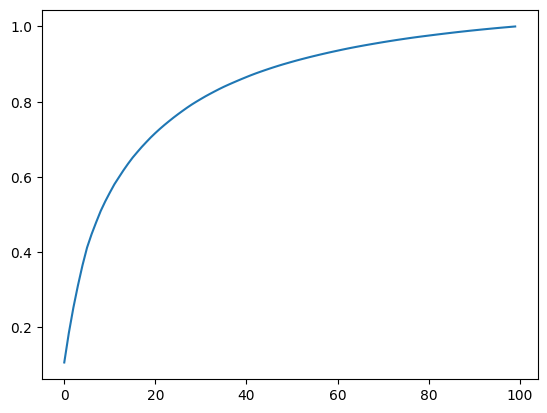

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))